# BOOTCAMP AI GS

## Case 2

Seu time faz parte de uma start-up de grande sucesso no setor de aluguel
de casas para curtas durações. A plataforma vem experimentando um crescimento
significativo, com o site e o aplicativo atraindo cada vez mais usuários.

Atualmente, o mercado principal da empresa é a Europa, onde a oferta de
acomodações continua aumentando. Com esse crescimento acelerado, a demanda
por decisões baseadas em dados tem se intensificado, tanto para análises preditivas
quanto prescritivas.
Neste momento de expansão, foi criada uma equipe, a de Data Product
Management.

### Objetivo
 O primeiro objetivo dessa equipe é entregar um produto de dados: um
modelo de regressão capaz de prever o valor esperado do aluguel com base em
informações sobre a acomodação (como número máximo de pessoas, quantidade de
quartos, distância ao centro da cidade, latitude, longitude, dia da semana, entre outras
features).


### Análise Exploratória

Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

Leitura das tabelas

In [2]:
df_barcelona_weekdays =  pd.read_csv('data/barcelona_weekdays.csv')
df_barcelona_weekends=  pd.read_csv('data/barcelona_weekends.csv')

df_berlin_weekdays =  pd.read_csv('data/berlin_weekdays.csv')
df_berlin_weekends =  pd.read_csv('data/berlin_weekends.csv')

df_paris_weekdays =  pd.read_csv('data/barcelona_weekdays.csv')
df_paris_weekends =  pd.read_csv('data/barcelona_weekends.csv')

Atribuindo colunas indicativas

In [3]:
# Incluindo o tipo de dia

df_barcelona_weekdays["type"] = "weekdays"
df_berlin_weekdays["type"] = "weekdays"
df_paris_weekdays["type"] = "weekdays"

df_barcelona_weekends["type"] = "weekends"
df_berlin_weekends["type"] = "weekends"
df_paris_weekends["type"] = "weekends"

# Incluindo o nome da cidade

df_barcelona_weekdays["city"] = "barcelona"
df_barcelona_weekends["city"] = "barcelona"

df_berlin_weekdays["city"] = "berlin"
df_berlin_weekends["city"] = "berlin"

df_paris_weekdays["city"] = "paris"
df_paris_weekends["city"] = "paris"



Concatenando para um só dataset

In [4]:
df_original = pd.concat([df_barcelona_weekdays, df_berlin_weekdays, df_paris_weekdays, df_barcelona_weekends, df_berlin_weekends, df_paris_weekends])

In [5]:
df_original.drop(df_original.columns[[0, 14, 16]], axis=1, inplace=True) 

In [6]:
df_original.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat,type,city
0,474.317499,Entire home/apt,False,False,4.0,False,0,1,10.0,91.0,1,1.111996,0.630491,17.942927,20.154890,2.17556,41.39624,weekdays,barcelona
1,169.897829,Private room,False,True,2.0,True,1,0,10.0,88.0,1,1.751839,0.124017,10.910462,17.484489,2.14906,41.38714,weekdays,barcelona
2,161.984779,Private room,False,True,4.0,False,0,1,9.0,88.0,1,1.670493,0.080322,11.726595,18.505814,2.15357,41.37859,weekdays,barcelona
3,367.956804,Entire home/apt,False,False,3.0,False,0,1,10.0,91.0,1,1.475847,0.093107,13.634603,20.837357,2.16839,41.37390,weekdays,barcelona
4,196.895292,Private room,False,True,3.0,False,1,0,9.0,91.0,1,1.855452,0.272486,11.793678,17.440874,2.15238,41.37699,weekdays,barcelona


In [7]:
df_original.shape

(8150, 19)

Tipos de Dados

In [8]:
df_original.dtypes

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index_norm               float64
rest_index_norm               float64
lng                           float64
lat                           float64
type                           object
city                           object
dtype: object

Valores Nulos

In [9]:
df_original.isna().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index_norm               0
rest_index_norm               0
lng                           0
lat                           0
type                          0
city                          0
dtype: int64

In [10]:
df_original.nunique()

realSum                       1184
room_type                        3
room_shared                      2
room_private                     2
person_capacity                  5
host_is_superhost                2
multi                            2
biz                              2
cleanliness_rating               8
guest_satisfaction_overall      42
bedrooms                         7
dist                          5317
metro_dist                    5317
attr_index_norm               5314
rest_index_norm               5314
lng                           2931
lat                           2786
type                             2
city                             3
dtype: int64

In [11]:
df = df_original.copy()

continuous = []
categorical = []

for c in df.columns[:-2]:
    if df.nunique()[c]>=30:
        continuous.append(c)
    else:
        categorical.append(c)

In [12]:
continuous 

['realSum',
 'guest_satisfaction_overall',
 'dist',
 'metro_dist',
 'attr_index_norm',
 'rest_index_norm',
 'lng',
 'lat']

In [13]:
df[categorical].head()

,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,bedrooms
0,Entire home/apt,False,False,4.0,False,0,1,10.0,1
1,Private room,False,True,2.0,True,1,0,10.0,1
2,Private room,False,True,4.0,False,0,1,9.0,1
3,Entire home/apt,False,False,3.0,False,0,1,10.0,1
4,Private room,False,True,3.0,False,1,0,9.0,1


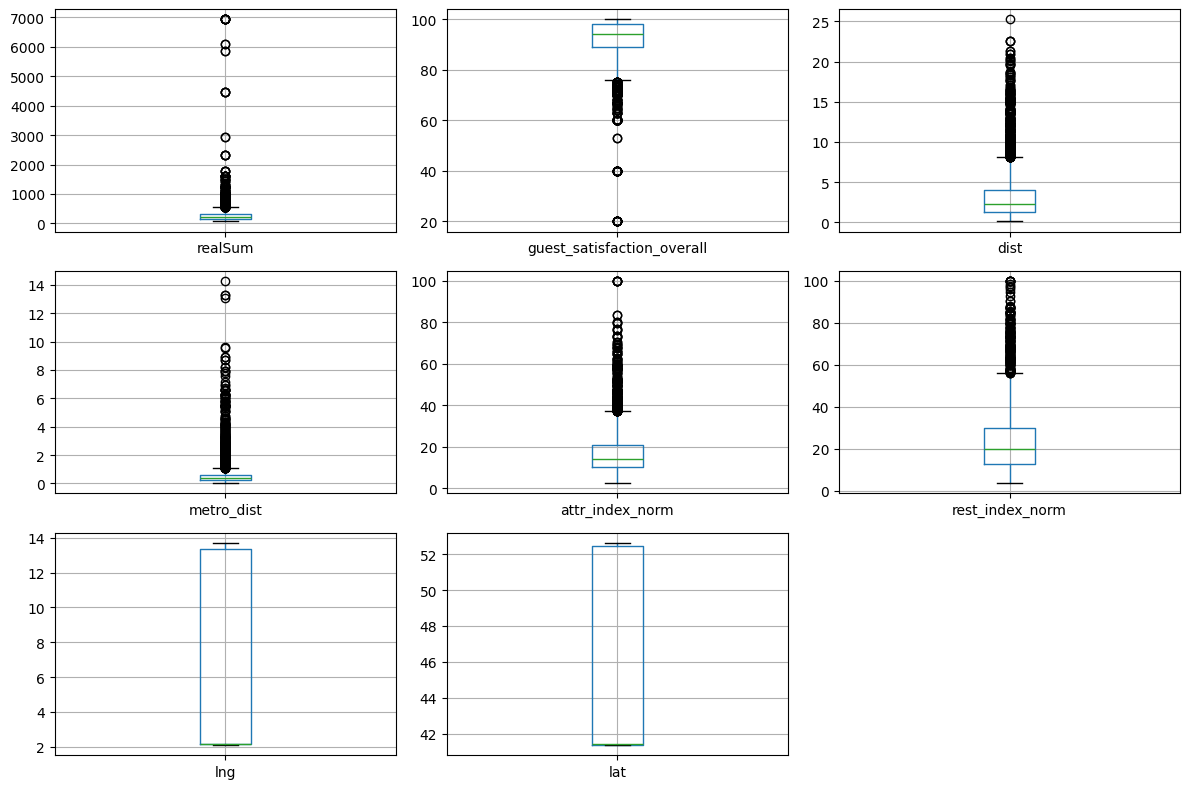

In [14]:
fig = plt.figure(figsize=(12,8))

for i, col in enumerate(continuous):
    plt.subplot(3,3,i+1)
    df.boxplot(col)
    plt.tight_layout()

## Transformação logarítmica nos dados contínuos

Reduz o impacto de outliers <br>
Torna a distribuição mais normal <br>
Facilita visualização e modelagem estatística 

In [15]:
df[continuous] = np.log1p(1 + df[continuous])

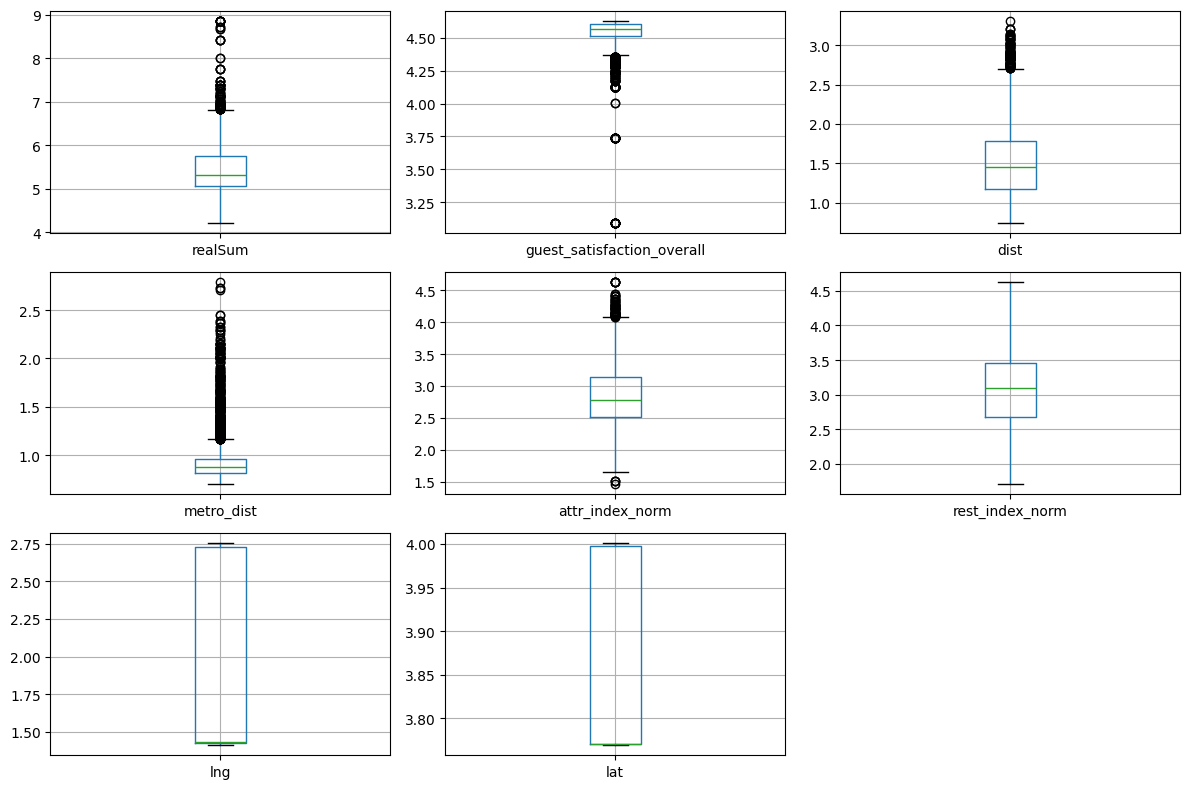

In [16]:
fig = plt.figure(figsize=(12,8))

for i, col in enumerate(continuous):
    plt.subplot(3,3,i+1)
    df.boxplot(col)
    plt.tight_layout()

### Mapa de correlação variáveis contínuas

A correlação varia entre -1 e 1: <br>
 0 - Nenhuma correlação (as variáveis não têm relação linear). <br>
+1 - Correlação positiva (se A aumenta, B aumenta proporcionalmente). <br>
-1 - Correlação negativa (se A aumenta, B diminui proporcionalmente). <br>

### Escala comum para interpretação

0.0 – 0.2 → Correlação muito fraca ou insignificante <br>
0.2 – 0.4 → Correlação fraca <br>
0.4 – 0.6 → Correlação moderada <br>
0.6 – 0.8 → Correlação forte <br>
0.8 – 1.0 → Correlação muito forte <br>

<Axes: >

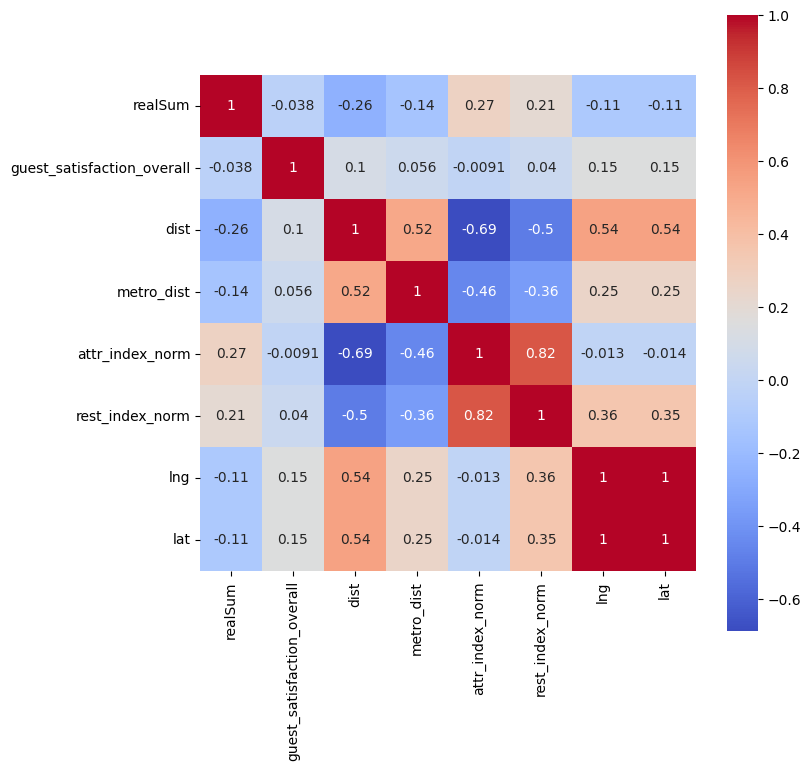

In [17]:
plt.figure(figsize=(8,8))

sns.heatmap(df[['realSum',
                'guest_satisfaction_overall',
                'dist',
                'metro_dist',
                'attr_index_norm',
                'rest_index_norm',
                'lng',
                'lat']].corr(), vmax = 1, square = True, cmap='coolwarm', annot=True  )


Text(0.5, 1.0, 'Relação entre Distância e Preço')

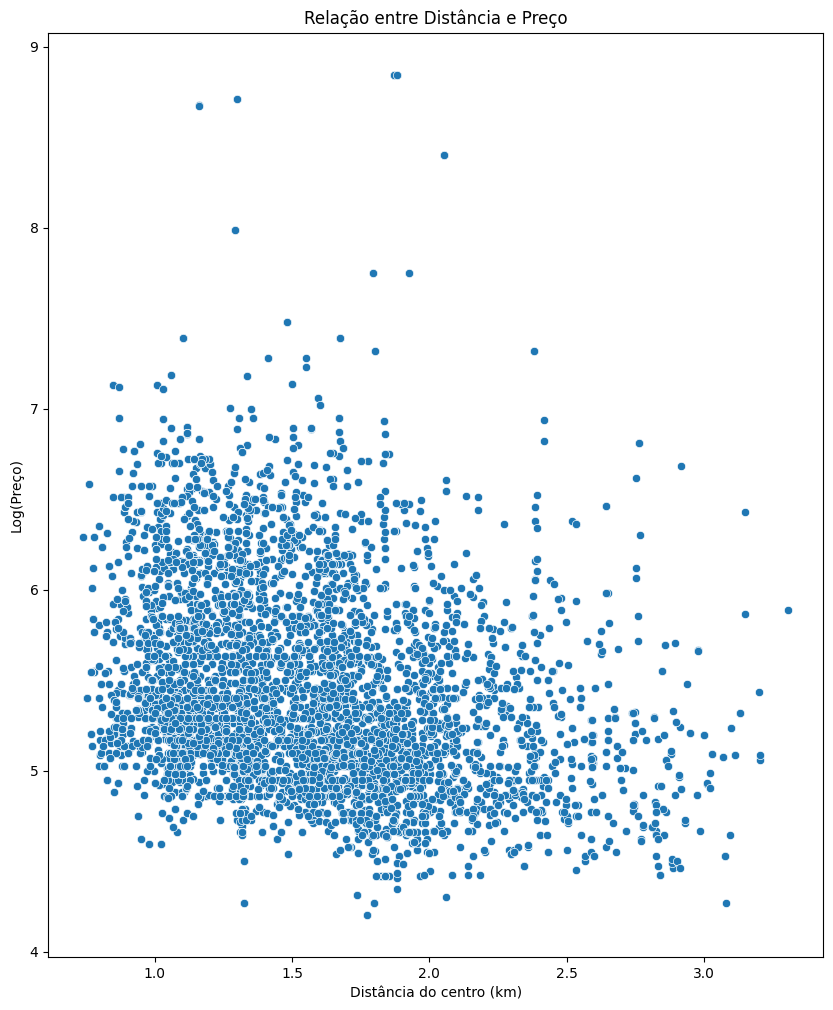

In [18]:
plt.figure(figsize=(10,12))

sns.scatterplot(data=df, x='dist', y='realSum')
plt.xlabel('Distância do centro (km)')
# plt.yticks(np.log1p([50, 100, 200, 500, 1000, 2000, 5000]), labels=[50, 100, 200, 500, 1000, 2000, 5000])
plt.ylabel('Log(Preço)')
plt.title('Relação entre Distância e Preço')

Text(0.5, 1.0, 'Distribuição dos preços')

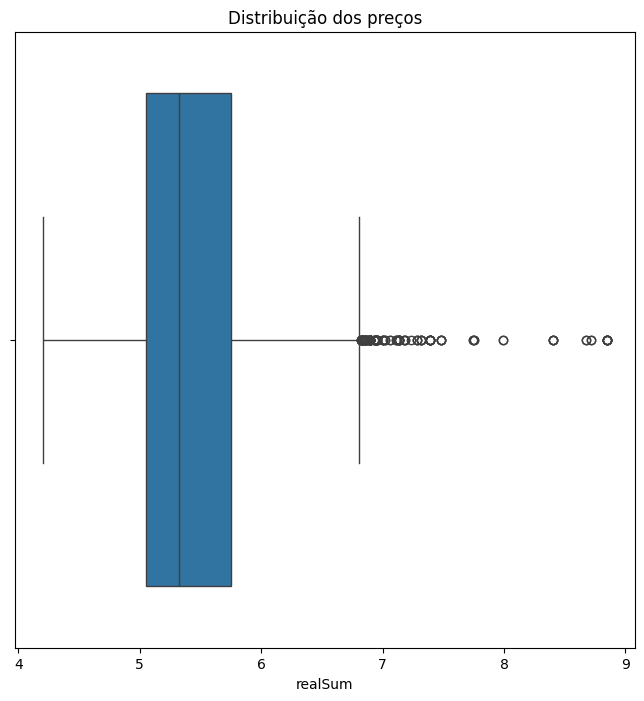

In [19]:
plt.figure(figsize=(8,8))

sns.boxplot(x=df['realSum'])
# plt.xticks(np.log1p([50, 100, 500, 1000, 5000]), labels=[50, 100, 500, 1000, 5000])

plt.title('Distribuição dos preços')

Text(0.5, 1.0, 'Distribuição de Preços por Cidade')

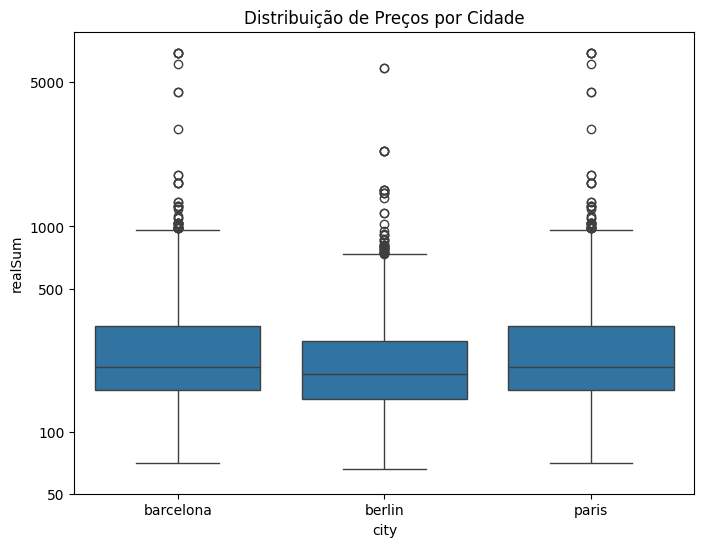

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="city", y="realSum") 
plt.yticks(np.log1p([50, 100, 500, 1000, 5000]), labels=[50, 100, 500, 1000, 5000])
plt.title("Distribuição de Preços por Cidade")


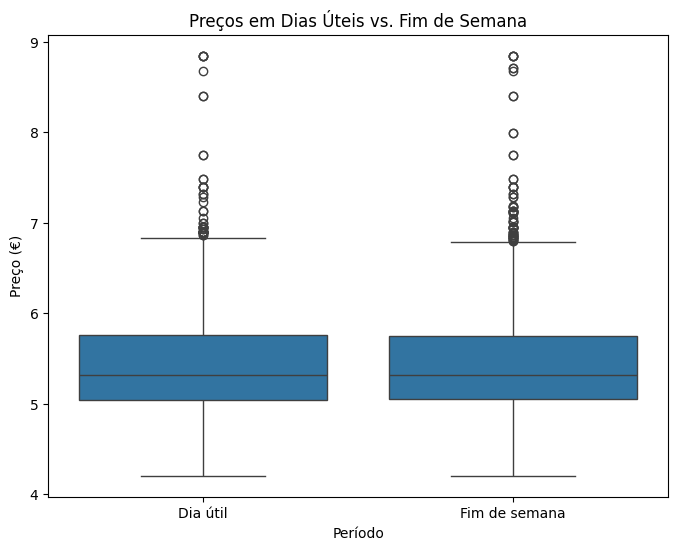

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="type", y="realSum")
plt.xticks([0, 1], ["Dia útil", "Fim de semana"])
plt.title("Preços em Dias Úteis vs. Fim de Semana")
plt.xlabel("Período")
plt.ylabel("Preço (€)")
plt.show()

Text(0.5, 1.0, 'Taxa de Limpeza por Cidade')

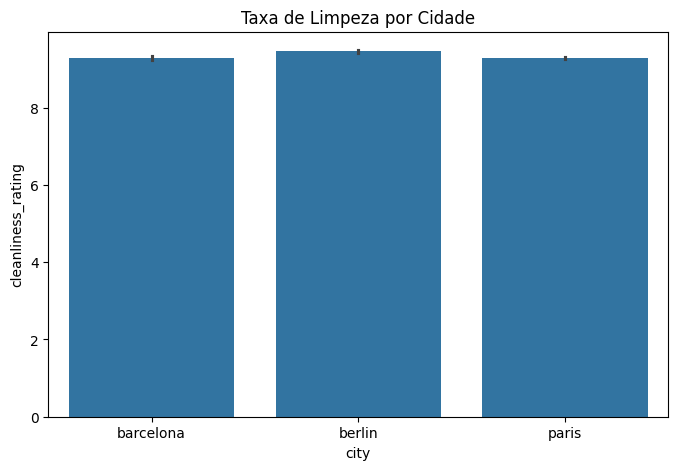

In [22]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="city", y="cleanliness_rating")
plt.title("Taxa de Limpeza por Cidade")


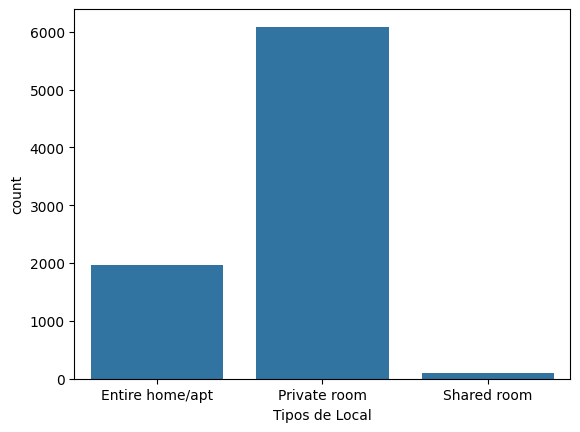

In [23]:
plt.xlabel("Tipos de Local")
sns.countplot(x=df['room_type'])
plt.show()

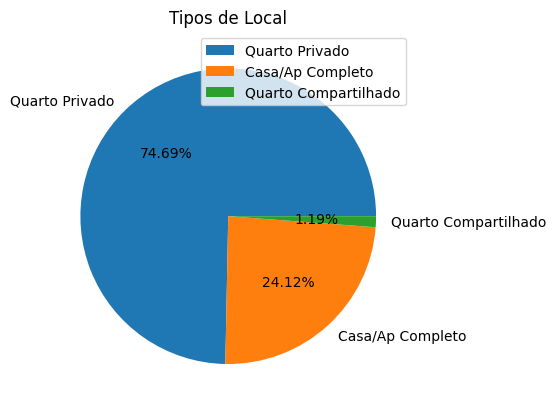

In [24]:
labels = ['Quarto Privado', 'Casa/Ap Completo', 'Quarto Compartilhado']
plt.title("Tipos de Local")
plt.pie(df['room_type'].value_counts(), labels = labels, autopct="%.2f%%")
plt.legend()

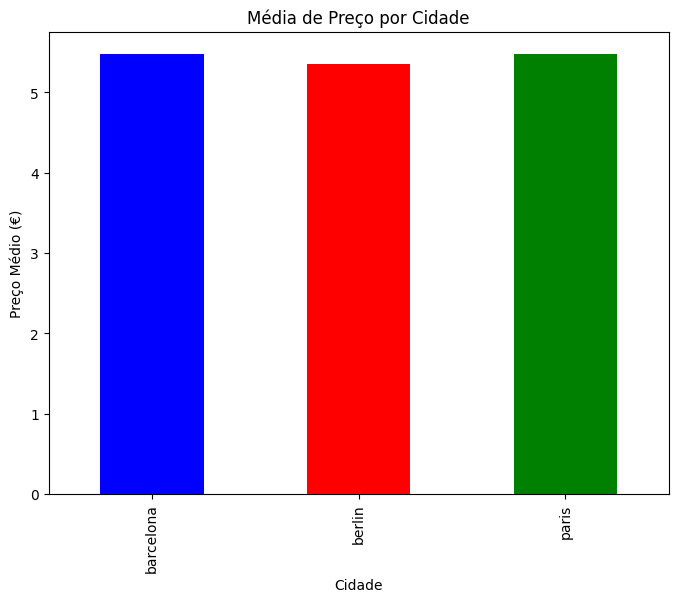

In [25]:
plt.figure(figsize=(8, 6))
df.groupby("city")["realSum"].mean().plot(kind="bar", color=["blue", "red", "green"])
plt.title("Média de Preço por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Preço Médio (€)")
plt.show()

# Pré-Processamento dos Dados

In [ ]:
df['room_shared'] = df['room_shared'].astype(int)
df['room_private'] = df['room_private'].astype(int)
df['host_is_superhost'] = df['host_is_superhost'].astype(int)
df['room_type'] = df['room_type'].astype('category')
df['type'] = df['type'].astype('category')
df['city'] = df['city'].astype('category')


In [ ]:
df = pd.get_dummies(df, columns=['room_type', 'type', 'city'], drop_first=True)

In [ ]:
df.describe()